In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno
%matplotlib inline

In [2]:
df= pd.read_csv('oneacre.csv')

In [5]:
df.head()

,SeasonName,DistrictName,SiteName,GroupName,ClientID,TotalOfSolarBundles,TotalRepayment,TotalCredit,NumRepayments,FirstRepaymentDate,Facilitator,LandSize,NewMember,TotalEnrolledSeasons,RepaymentDate,RepaymentTypeName,RepaymentCategoryName,RunningTotal,default_status
0,LR2016,Butere,Malaha,Fanya Ule,895315,0,10220.0,10220,9,11/13/2015,False,0.50,True,1,20151120,MobileMoney,Revenue,1025.0,True
1,LR2016,Webuye,Sinoko,Alpha,385693,2,19890.0,19890,13,11/10/2015,False,0.50,False,7,20151110,MobileMoney,Revenue,500.0,True
2,LR2015,Lugari,Mulimani,Baraka,1635357,1,13220.0,13220,12,11/10/2014,True,0.75,False,6,20141208,MobileMoney,Revenue,9020.0,True
3,LR2016,Webuye,Ondoti,Timakila,568321,1,9700.0,9700,7,11/16/2015,False,0.50,True,4,20151116,MobileMoney,Revenue,500.0,True
4,LR2018,Bungoma,Khaoya,Baraka,38603,0,6085.0,6085,8,11/7/2017,False,0.50,False,6,20171130,MobileMoney,Revenue,504.0,True


In [6]:
df.describe()

,ClientID,TotalOfSolarBundles,TotalRepayment,TotalCredit,NumRepayments,LandSize,TotalEnrolledSeasons,RepaymentDate,RunningTotal
count,6.364640e+05,636464.000000,636464.000000,636464.000000,636464.000000,636464.000000,636464.000000,6.364640e+05,636464.000000
mean,1.558668e+06,0.525527,9806.143044,9924.282824,17.319060,0.598257,3.008266,2.015941e+07,1072.918496
std,7.086755e+05,0.552769,4232.559018,4213.006301,9.587718,0.427424,1.838608,1.089743e+04,1078.224055
min,9.773000e+03,0.000000,0.000000,700.000000,1.000000,0.000000,1.000000,2.014110e+07,-9360.000000
25%,1.075044e+06,0.000000,6625.000000,6750.000000,11.000000,0.250000,2.000000,2.015112e+07,500.000000
50%,1.652488e+06,0.000000,9395.000000,9500.000000,15.000000,0.500000,3.000000,2.016113e+07,745.000000
75%,2.141271e+06,1.000000,12175.000000,12355.000000,21.000000,0.750000,4.000000,2.017112e+07,1250.000000
max,2.668235e+06,5.000000,41490.000000,44540.000000,339.000000,6.000000,15.000000,2.017121e+07,30765.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636464 entries, 0 to 636463
Data columns (total 19 columns):
SeasonName               636464 non-null object
DistrictName             636464 non-null object
SiteName                 636464 non-null object
GroupName                636464 non-null object
ClientID                 636464 non-null int64
TotalOfSolarBundles      636464 non-null int64
TotalRepayment           636464 non-null float64
TotalCredit              636464 non-null int64
NumRepayments            636464 non-null int64
FirstRepaymentDate       636464 non-null object
Facilitator              636464 non-null bool
LandSize                 636464 non-null float64
NewMember                636464 non-null bool
TotalEnrolledSeasons     636464 non-null int64
RepaymentDate            636464 non-null int64
RepaymentTypeName        636464 non-null object
RepaymentCategoryName    636464 non-null object
RunningTotal             636464 non-null float64
default_status           636464 

In [8]:
df.dtypes

SeasonName                object
DistrictName              object
SiteName                  object
GroupName                 object
ClientID                   int64
TotalOfSolarBundles        int64
TotalRepayment           float64
TotalCredit                int64
NumRepayments              int64
FirstRepaymentDate        object
Facilitator                 bool
LandSize                 float64
NewMember                   bool
TotalEnrolledSeasons       int64
RepaymentDate              int64
RepaymentTypeName         object
RepaymentCategoryName     object
RunningTotal             float64
default_status              bool
dtype: object

In [9]:
df.isna().sum()

SeasonName               0
DistrictName             0
SiteName                 0
GroupName                0
ClientID                 0
TotalOfSolarBundles      0
TotalRepayment           0
TotalCredit              0
NumRepayments            0
FirstRepaymentDate       0
Facilitator              0
LandSize                 0
NewMember                0
TotalEnrolledSeasons     0
RepaymentDate            0
RepaymentTypeName        0
RepaymentCategoryName    0
RunningTotal             0
default_status           0
dtype: int64

In [3]:
df['ClientID']=df['ClientID'].astype(str)

In [4]:
df['FirstRepaymentDate']=df['FirstRepaymentDate'].apply(pd.to_datetime)

In [5]:
df['Weekday']=df.FirstRepaymentDate.dt.weekday_name
df['Month_Name']=df.FirstRepaymentDate.dt.month
df['Quarter']=df.FirstRepaymentDate.dt.quarter
df['Day']=df.FirstRepaymentDate.dt.day

In [6]:
df.groupby('NewMember').default_status.count()

NewMember
False    265524
True     370940
Name: default_status, dtype: int64

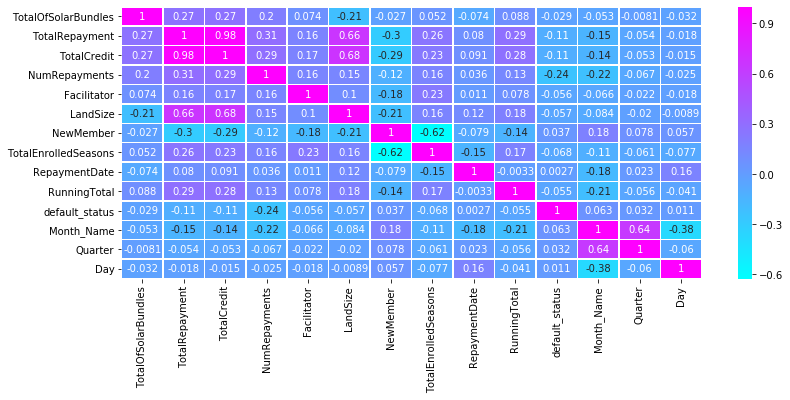

In [8]:
fig,ax=plt.subplots(figsize=(13,5))
sns.heatmap(df.corr(),annot=True,cmap='cool',linewidth=0.5)
plt.show()

In [9]:
df.RepaymentCategoryName.value_counts()

Revenue      636177
Bonus           230
Write Off        40
Trial            14
Refund            3
Name: RepaymentCategoryName, dtype: int64

In [10]:
df.groupby(['RepaymentTypeName']).default_status.value_counts()

RepaymentTypeName           default_status
Auditor                     False                 11
                            True                   7
Crop Failure Compensation   True                 150
                            False                 80
Deceased Debt Cancellation  True                  40
Dropped Client Refund       True                   2
                            False                  1
MobileMoney                 True              287790
                            False             265506
Receipt                     True               59159
                            False              23704
Trial                       False                 13
                            True                   1
Name: default_status, dtype: int64

In [18]:
dafml2=df.copy()

In [12]:
df.SiteName.nunique()

1539

In [13]:
df.SiteName.head(10)

0           Malaha
1           Sinoko
2         Mulimani
3           Ondoti
4           Khaoya
5    Kawuor kawere
6         Kapsotik
7         Shabwali
8           Maraka
9        Gavudunyi
Name: SiteName, dtype: object

In [19]:
dafml2=dafml2.drop(columns=['SiteName','GroupName','ClientID','FirstRepaymentDate','RepaymentDate'],axis=1)

In [20]:
dafml2.columns

Index(['SeasonName', 'DistrictName', 'TotalOfSolarBundles', 'TotalRepayment',
       'TotalCredit', 'NumRepayments', 'Facilitator', 'LandSize', 'NewMember',
       'TotalEnrolledSeasons', 'RepaymentTypeName', 'RepaymentCategoryName',
       'RunningTotal', 'default_status', 'Weekday', 'Month_Name', 'Quarter',
       'Day'],
      dtype='object')

In [23]:
dafml2.shape

(636464, 18)

In [24]:
dafml2=dafml2.drop(columns=[ 'Weekday', 'Month_Name', 'Quarter','Day'],axis=1)

In [25]:
dafml2.shape

(636464, 14)

In [27]:
dafml2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636464 entries, 0 to 636463
Data columns (total 14 columns):
SeasonName               636464 non-null object
DistrictName             636464 non-null object
TotalOfSolarBundles      636464 non-null int64
TotalRepayment           636464 non-null float64
TotalCredit              636464 non-null int64
NumRepayments            636464 non-null int64
Facilitator              636464 non-null bool
LandSize                 636464 non-null float64
NewMember                636464 non-null bool
TotalEnrolledSeasons     636464 non-null int64
RepaymentTypeName        636464 non-null object
RepaymentCategoryName    636464 non-null object
RunningTotal             636464 non-null float64
default_status           636464 non-null bool
dtypes: bool(3), float64(3), int64(4), object(4)
memory usage: 55.2+ MB


In [28]:
catsecond=['SeasonName','DistrictName','RepaymentTypeName','RepaymentCategoryName']

In [29]:
df.DistrictName.nunique()

39

In [30]:
df.RepaymentTypeName.nunique()

7

In [42]:
#df.RepaymentCategoryName.loc['Write Off']

In [32]:
df_last=pd.get_dummies(dafml2,columns=catsecond,drop_first=True)

In [33]:
df_last.columns

Index(['TotalOfSolarBundles', 'TotalRepayment', 'TotalCredit', 'NumRepayments',
       'Facilitator', 'LandSize', 'NewMember', 'TotalEnrolledSeasons',
       'RunningTotal', 'default_status', 'SeasonName_LR2016',
       'SeasonName_LR2017', 'SeasonName_LR2018', 'DistrictName_Belgut',
       'DistrictName_Borabu', 'DistrictName_Bungoma', 'DistrictName_Busia',
       'DistrictName_Butere', 'DistrictName_Cherangany', 'DistrictName_Chwele',
       'DistrictName_Gem', 'DistrictName_Green Shamba', 'DistrictName_Gucha',
       'DistrictName_Hamisi', 'DistrictName_KENYA STAFF',
       'DistrictName_Kabiyet', 'DistrictName_Kabondo',
       'DistrictName_Kakamega (South)', 'DistrictName_Kakamega B (North)',
       'DistrictName_Kapsabet', 'DistrictName_Kimilili', 'DistrictName_Kisii',
       'DistrictName_Lugari', 'DistrictName_Masaba', 'DistrictName_Matete',
       'DistrictName_Migori', 'DistrictName_Mumias', 'DistrictName_Nambale',
       'DistrictName_Ndalu', 'DistrictName_Nyamira', 'Distric

In [54]:
df_last.dtypes

TotalOfSolarBundles                               int64
TotalRepayment                                  float64
TotalCredit                                       int64
NumRepayments                                     int64
Facilitator                                        bool
LandSize                                        float64
NewMember                                          bool
TotalEnrolledSeasons                              int64
RunningTotal                                    float64
default_status                                     bool
SeasonName_LR2016                                 uint8
SeasonName_LR2017                                 uint8
SeasonName_LR2018                                 uint8
DistrictName_Belgut                               uint8
DistrictName_Borabu                               uint8
DistrictName_Bungoma                              uint8
DistrictName_Busia                                uint8
DistrictName_Butere                             

In [ ]:
df_last=pd.get_dummi

In [52]:
df_last.shape

(636464, 61)

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X=df_last.drop(columns=['default_status'],axis=1)
y=df_last['default_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler().fit(X_train)

X_train=

In [61]:
#df_last.head()

In [63]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=150)

In [64]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
predictions2=()